# Applying XGBoost to the data

First there is a need to import all the relevant modules

In [2]:
from data import result_df
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_validate

Taking a look at our dataframe

In [7]:
result_df.head()

,Date,Close,Headlines
0,2016-06-30,715.619995,"Amazon Inspire, a resource site where teachers..."
1,2016-10-02,715.619995,The e-commerce giant has big plans to use auto...
2,2016-10-27,818.359985,The creator of “Mad Men” has signed on for an ...
3,2016-10-28,776.320007,The company said to expect as much as $1.25 bi...
4,2016-12-05,759.359985,At an experimental store on the ground floor o...


Then comes changing the date to fit scikit-learn's XGBoost model

In [4]:
X = result_df[['Open', 'High', 'Low', 'Polarity', 'Sentiment']]
y = result_df[['Close']]

reg = xgb.XGBRegressor(n_estimators=50)
#Train-test-split and crossvalidation - crossvalidate convenience function (gives the type of error you want)
tscv = TimeSeriesSplit(n_splits=4)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Scaling all values for a normalized input and output
min_max_scaler = MinMaxScaler()

# Changed fit_transform to transform for test fold to avoid data leakage from future test set
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)
y_train = min_max_scaler.fit_transform(y_train)
y_test = min_max_scaler.transform(y_test)

reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50, #stop if 50 consequent rounds without decrease of error
        verbose=False) # Change verbose to True if you want to see it train

[20:46:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

R-squared metric

In [5]:
predict = reg.predict(X_test)
print("R-squared value: ", reg.score(X_test, y_test))

R-squared value:  0.9866523109744227


Feature importance

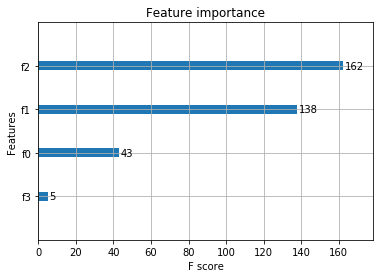

In [6]:
xgb.plot_importance(reg)
plt.show()